<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [3]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head(30)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
5,6,I code primarily as a hobby,Under 18 years old,"Student, full-time",NaN,Apples,NaN,Primary/elementary school,"School (i.e., University, College, etc);Online...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
6,7,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN,NaN
7,8,I am learning to code,18-24 years old,"Student, full-time;Not employed, but looking f...",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Video-based Online Cou...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Difficult,NaN,NaN
8,9,I code primarily as a hobby,45-54 years old,"Employed, full-time",In-person,Apples,Hobby,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Other online resources ...,Stack Overflow;Written-based Online Courses,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN,NaN
9,10,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


In [5]:
industry_counts = df['Industry'].value_counts()

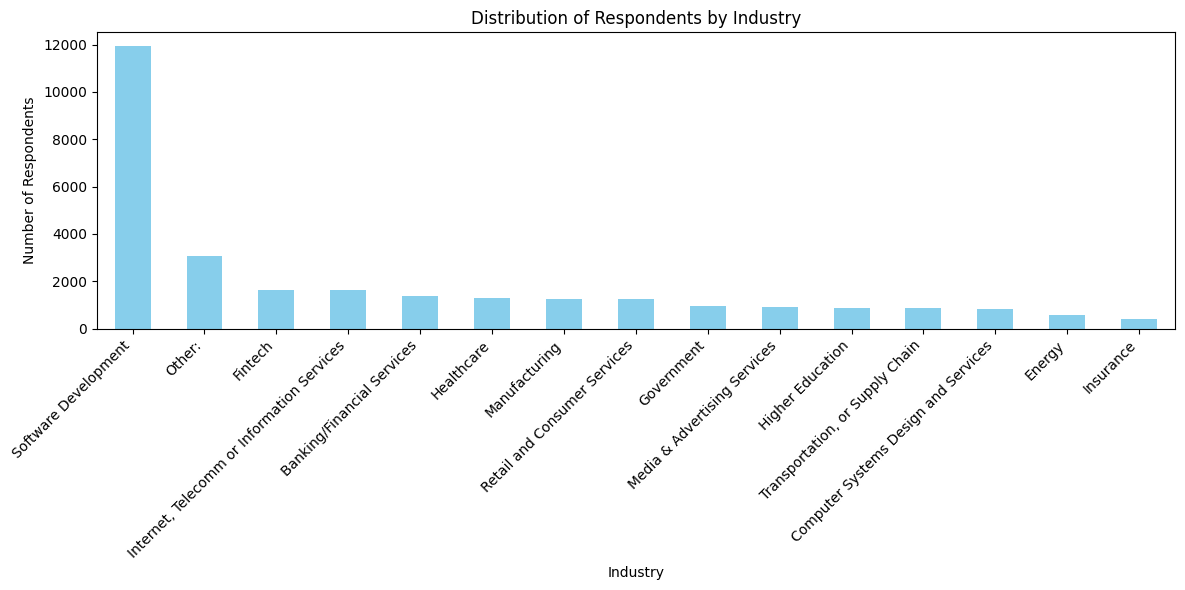

In [7]:
plt.figure(figsize=(12, 6))
industry_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [9]:
mean_comp = df['ConvertedCompYearly'].mean()
median_comp = df['ConvertedCompYearly'].median()
std_comp = df['ConvertedCompYearly'].std()

print(f"Mean compensation: {mean_comp:.2f}")
print(f"Median compensation: {median_comp:.2f}")
print(f"Standard Deviation: {std_comp:.2f}")

Mean compensation: 86155.29
Median compensation: 65000.00
Standard Deviation: 186756.97


In [10]:
threshold = mean_comp + 3 * std_comp
print(f"Compensation threshold for extremely high values: {threshold:.2f}")

Compensation threshold for extremely high values: 646426.21


In [12]:
high_earners = df[df['ConvertedCompYearly'] > threshold]
print(f"Number of respondents with extremely high compensation: {high_earners.shape[0]}")

Number of respondents with extremely high compensation: 89


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [13]:
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 - 1.5 * IQR

print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

IQR: 75259.50
Lower bound: -80177.25
Upper bound: -4917.75


In [14]:
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
print(f"Number of outliers detected: {outliers.shape[0]}")


Number of outliers detected: 23435


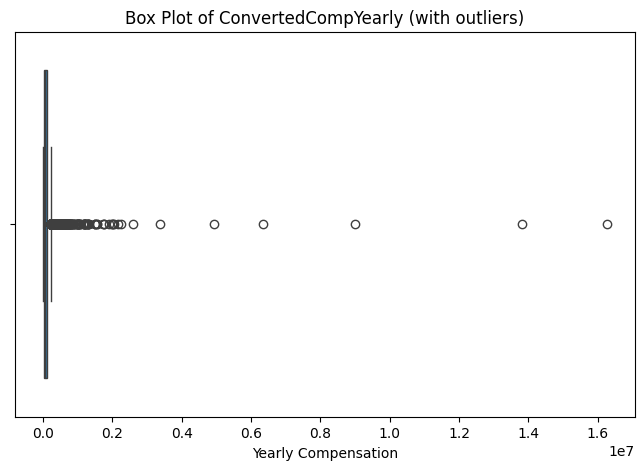

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['ConvertedCompYearly'])
plt.title('Box Plot of ConvertedCompYearly (with outliers)')
plt.xlabel('Yearly Compensation')
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [16]:
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

print(f"Original DataFrame shape: {df.shape}")
print(f"New DataFrame shape (without outliers): {df_no_outliers.shape}")
print(f"Number of rows removed: {df.shape[0] - df_no_outliers.shape[0]}")


Original DataFrame shape: (65437, 114)
New DataFrame shape (without outliers): (22457, 114)
Number of rows removed: 42980


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [17]:
df['Age'].unique()[:10]  # Show first 10 unique entries

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

In [18]:
df['AgeCleaned'] = df['Age'].str.extract(r'(\d{2}-\d{2})')  # e.g., "45-54"

In [19]:
age_map = {
    'Under 18': 16,
    '18-24': 21,
    '25-34': 30,
    '35-44': 40,
    '45-54': 50,
    '55-64': 60,
    '65 or older': 70,
    '65+': 70
}

# Handle ranges like '45-54'
df['AgeCleaned'] = df['Age'].str.extract(r'(\d{2}-\d{2})')
df['AgeNum'] = df['AgeCleaned'].map({
    '18-24': 21,
    '25-34': 30,
    '35-44': 40,
    '45-54': 50,
    '55-64': 60
})


In [20]:
corr_matrix = df.select_dtypes(include='number').corr()
print(corr_matrix['AgeNum'].sort_values(ascending=False))


AgeNum                 1.000000
WorkExp                0.844407
ConvertedCompYearly    0.121447
JobSat                 0.065907
CompTotal             -0.002727
JobSatPoints_1        -0.027599
ResponseId            -0.035639
JobSatPoints_8        -0.048786
JobSatPoints_6        -0.052643
JobSatPoints_4        -0.074328
JobSatPoints_9        -0.083842
JobSatPoints_7        -0.086174
JobSatPoints_5        -0.101726
JobSatPoints_11       -0.106620
JobSatPoints_10       -0.114478
Name: AgeNum, dtype: float64


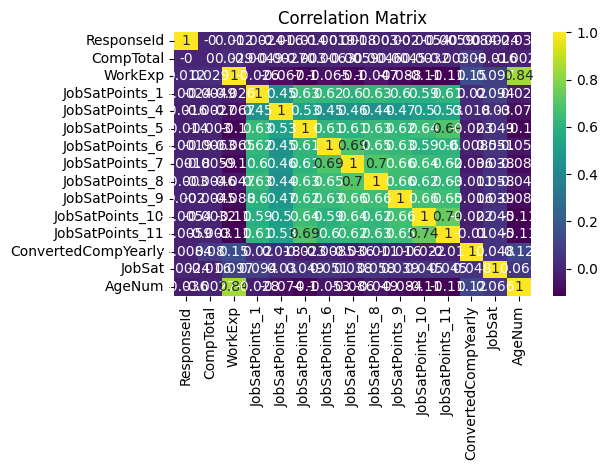

In [21]:
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
